In [91]:
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

## Loading the image 

In [92]:
# read image and convert to RGB
image = Image.open("readonly/msi_recruitment.gif")
image = image.convert('RGB')

bands = image.getbands()
band_enhancers = []
intensities = [0.1, 0.5, 0.9]

for band in bands:
    band_enhancers.append(ImageEnhance.Brightness(image.getchannel(band)))

## Adjusting the colours

In [93]:
# list for all the created images and for the annotations
images = []
annotations = []
channels = [image.getchannel('R'), image.getchannel('G'), image.getchannel('B')]

for num, enhancer in enumerate(band_enhancers):
    for i in intensities:
        changed_channel = enhancer.enhance(i)
        new_channels = channels[:]
        new_channels[num] = changed_channel
        changed_img = Image.merge('RGB', new_channels)
        
        images.append(changed_img)
        annotations.append(f"channel {num} intensity {i}")

## Creating the contact sheet

In [94]:
# create a contact sheet for all variants
first_image = images[0]
text_height = 75
gap = 15
x = 0
y = 0

# create an empty canvas
contact_sheet = PIL.Image.new(first_image.mode, 
                              (first_image.width * 3 + gap * 2, first_image.height * 3 + text_height * 3 + gap * 3),
                              (215, 220, 220))  # background colour
draw_context = ImageDraw.Draw(contact_sheet)
fnt = ImageFont.truetype("readonly/fanwood-webfont.ttf", 55)
draw_context.fontmode = "L"

for num, img in enumerate(images):
    # first paste the image
    contact_sheet.paste(img, (x, y))
    
    # secondly write the text on the image
    text_position = (x + 25, y + first_image.height + gap)
    draw_context.text(text_position, annotations[num], font=fnt, fill = (12, 12, 12))
    
    if x + first_image.width >= contact_sheet.width:
        x = 0
        y = y + first_image.height + text_height + gap
    else:
        x = x + first_image.width + gap

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width // 2), int(contact_sheet.height // 2)),
                                    resample=Image.LANCZOS, box=None)

## Output final image

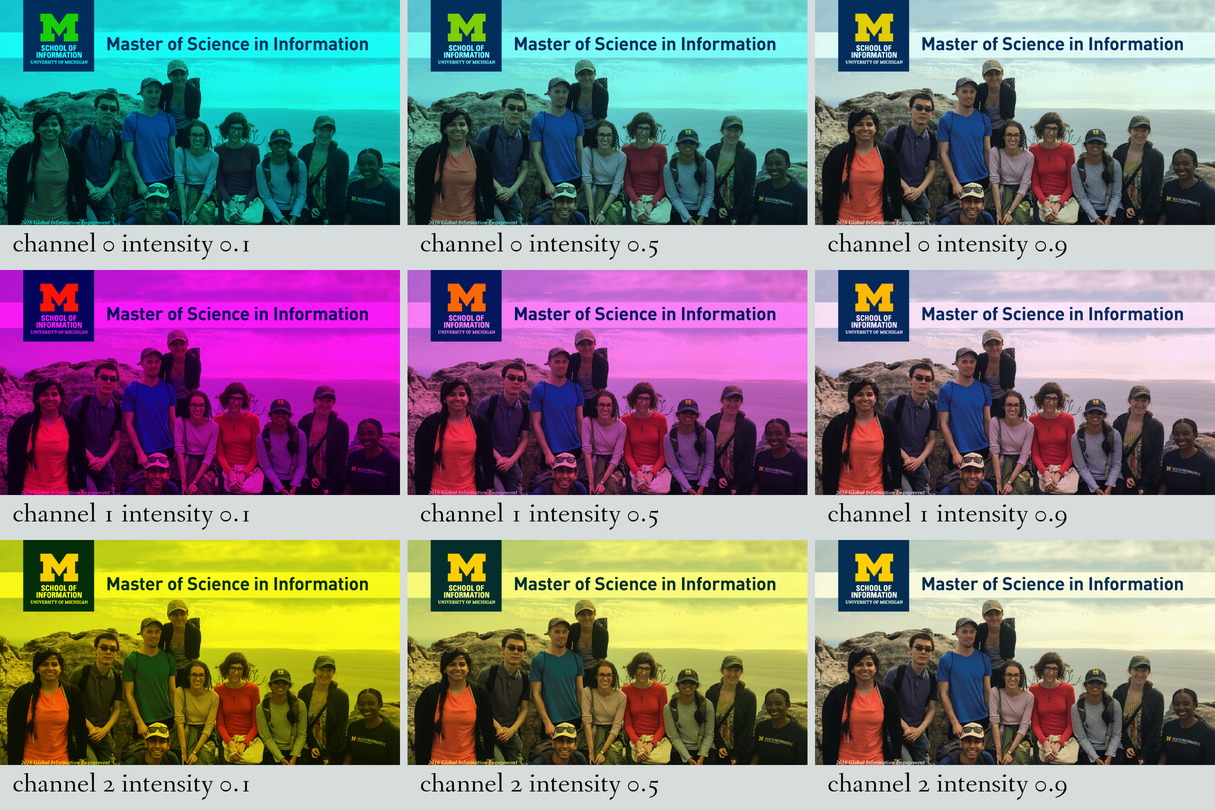

In [95]:
display(contact_sheet)